# COVID-19 growth analysis

(c) 2020, [Thomas Wiecki](https://twitter.com/twiecki)<br>
Adapted for South Africa by [Alta de Waal](https://twitter.com/AltadeWaal) 

This notebook gets up-to-date data from the [Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]](https://github.com/dsfsi/covid19za) and recreates the (pay-walled) plot in the [Financial Times]( https://www.ft.com/content/a26fbf7e-48f8-11ea-aeb3-955839e06441).

In [1]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

## Load data

In [2]:
def load_timeseries(name):
    df = pd.read_csv(name)
    df = (df.set_index('date'))
    df.index = pd.to_datetime(df.index, dayfirst=True)
    
    return df

df = load_timeseries('../data/covid19za_timeline_confirmed.csv')

In [3]:
df.head()

,case_id,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,type
date,,,,,,,,,
2020-03-05,1,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
2020-03-07,2,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,travel
2020-03-08,3,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel
2020-03-09,4,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
2020-03-09,5,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel


In [4]:
def plot_confirmed(provinces, min_cases=100, ls='-'):
    for province in provinces:
        
        df1 = df.loc[(df.province == province)].groupby(['date']).agg({'country': ['count']})
        df1.columns = ['new cases']
        df1['cummulative'] = df1['new cases'].cumsum()
        (df1.reset_index()['cummulative']
            .plot(label=province, ls=ls))
        print('\n' + province +":")
        print(df1)


GP:
            new cases  cummulative
date                              
2020-03-07          1            1
2020-03-11          4            5
2020-03-12          1            6
2020-03-13          4           10
2020-03-14          7           17
2020-03-15          7           24
2020-03-16          7           31
2020-03-17         14           45
2020-03-18         16           61
2020-03-19         15           76
2020-03-20         33          109
2020-03-21         16          125
2020-03-22          7          132
2020-03-23         75          207
2020-03-24         95          302
2020-03-25         64          366

WC:
            new cases  cummulative
date                              
2020-03-11          1            1
2020-03-13          2            3
2020-03-14          6            9
2020-03-15          5           14
2020-03-16          2           16
2020-03-17          5           21
2020-03-18         10           31
2020-03-19         15           46
2020-03-20

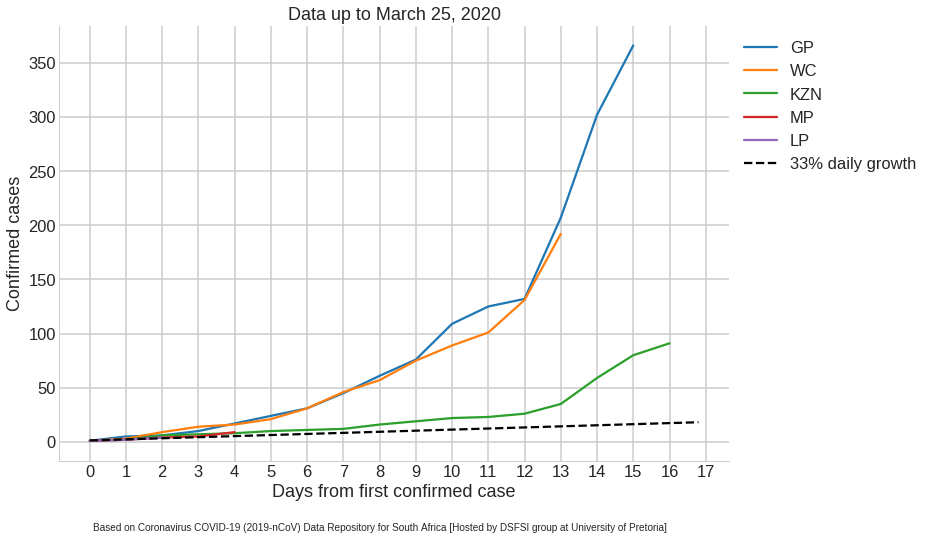

In [5]:
# sns.set_palette(sns.hls_palette(8, l=.45, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

provinces = ['GP', 'WC', 'KZN','MP','LP']
plot_confirmed(provinces, min_cases=1, ls='-')



x = np.linspace(0, plt.xlim()[1])
plt.plot(x,x+(1.33), ls='--', color='k', label='33% daily growth')

#plt.yscale('log');
plt.title('Data up to {}'.format(df.index.max().strftime('%B %d, %Y')))
plt.xlabel('Days from first confirmed case')
plt.ylabel('Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks(range(0,int(plt.xlim()[1])+1))
plt.legend(bbox_to_anchor=(1.0, 1.0))
sns.despine()
plt.annotate('Based on Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]', 
             (0.1, 0.01), xycoords='figure fraction', fontsize=10)
plt.savefig("../visualisation/per_province_growth_first_report.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0, dpi = 200)